In [1]:
import numpy as np 

In [2]:
import cv2 as cv

In [3]:
import matplotlib.pyplot as plt

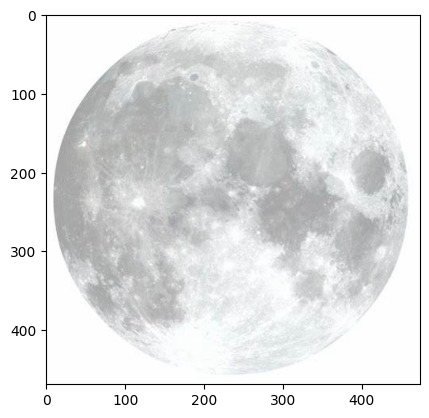

In [36]:
img = cv.imread("moon.jpeg")
plt.imshow(img)
plt.show()

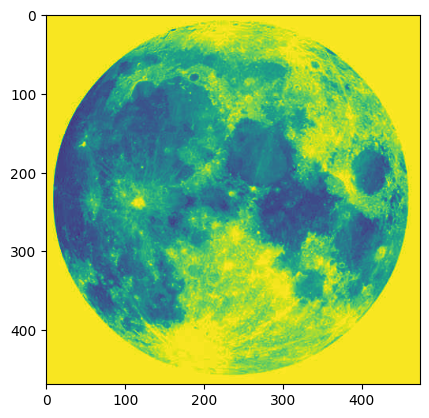

In [37]:
gray =cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

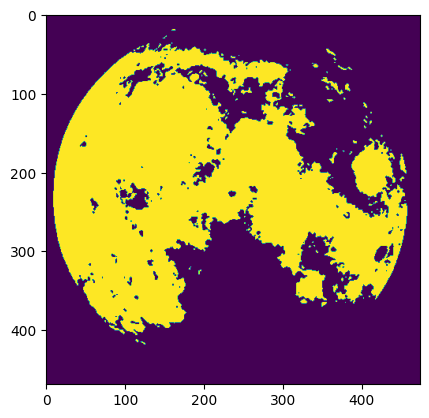

In [38]:
img_t=cv.medianBlur(gray,3)
ret, thresh = cv.threshold(img_t,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

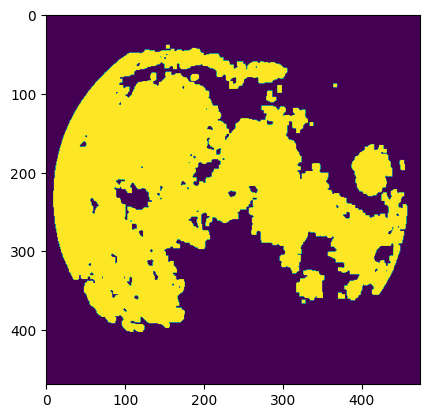

In [39]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening)
plt.show() 

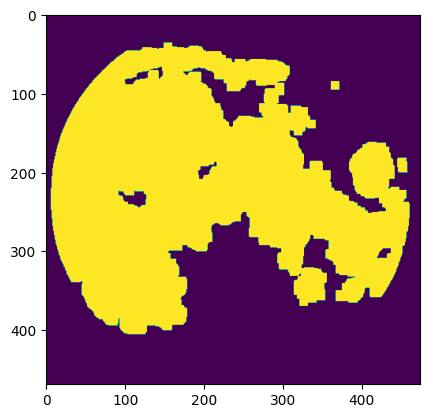

In [40]:
sure_bg = cv.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg)
plt.show()

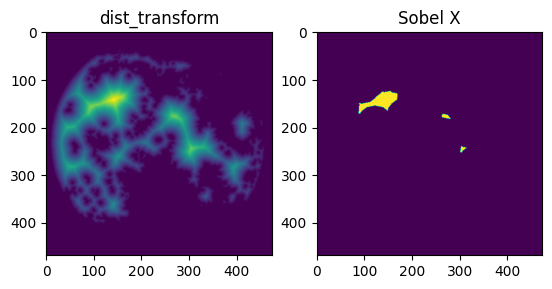

In [41]:
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
plt.subplot(1,2,1), plt.imshow(dist_transform)
plt.title('dist_transform'),

ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.subplot(1,2,2), plt.imshow(sure_fg)
plt.title('Sobel X')
plt.show()

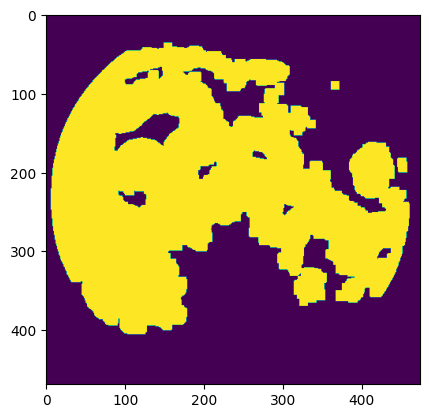

In [42]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown)
plt.show()

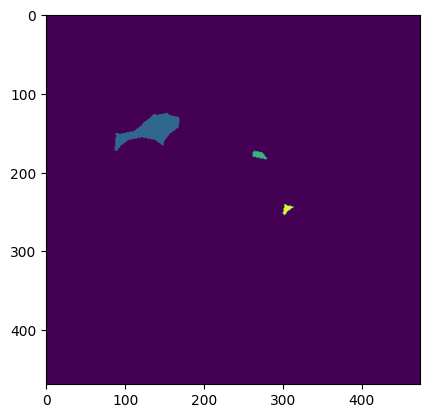

In [43]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

plt.imshow(markers)
plt.show()

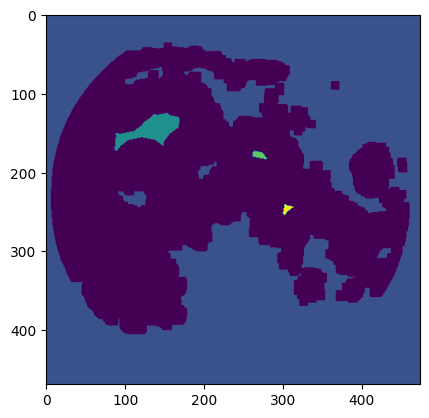

In [44]:
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)
plt.show()

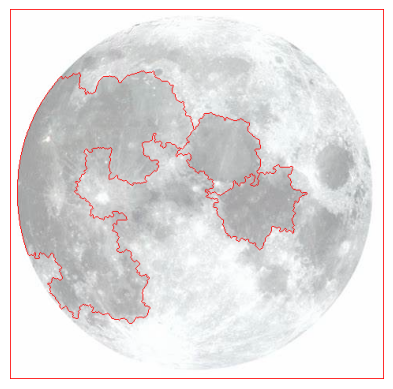

In [45]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)
plt.axis('off')
plt.show()